# Merrill Lynch Credit Indices 

In [150]:
library(dplyr)
library(ggplot2)
library(reshape2)
library(Quandl)
library(dualplot)

In [141]:
Quandl.api_key(api_key = "8u9meDr5sQxGim8ATVt6")

In [208]:
yields = list(c('US_AAA','ML/AAAEY'),
         c('US_AA','ML/AAY'),
         c('US_A','ML/AEY'),
         c('US_BBB','ML/BBBEY'),
         c('US_BB','ML/BBY'),
         c('US_B','ML/BEY'),
         c('US_CCC','ML/CCCY'),
         c('US_Corporates','ML/USEY'),
         c('US_High_Yield','ML/USTRI'),
         c('EM_High_Grade','ML/EMHGY'),
         c('Euro_EM','ML/EEMCBI'))

oas = list(c('EM_Corp','ML/EMCBI'),
      c('US_High_Yield','ML/HYOAS'),
      c('US_AA','ML/AAOAS'),
      c('US_B','ML/BOAS'))

spx = c('SPX 500','CHRIS/CME_ES1.1')

# 1.) Yields

In [209]:
plot_yields = function(metric, indicator, start, end, frequency) {
    df = Quandl(code = metric[[grep(indicator, x=metric)]][2], start_date=start, end_date=end, collapse=frequency)
    rownames(df) = df$DATE
    df$DATE = NULL
    colnames(df) = indicator
    plot(x=as.Date(rownames(df)), 
         y=df[,indicator], 
         type='line', 
         xlab='Date',
         ylab='Effective Yield',
         main=indicator)
}

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”

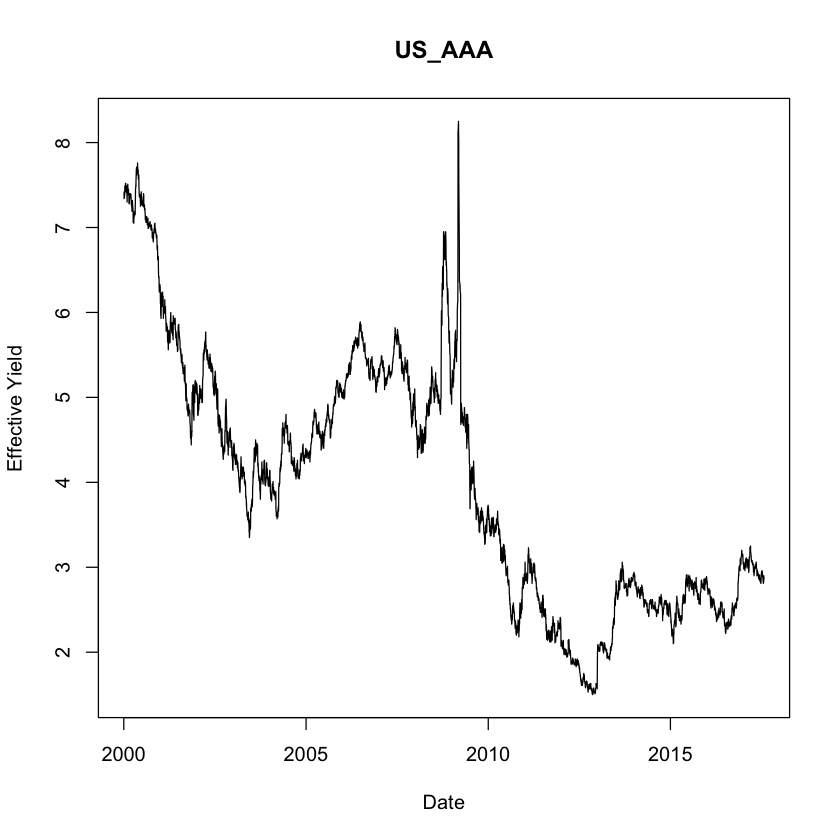

In [210]:
plot_yields(metric=yields,
        indicator='US_AAA', 
         start='01-01-2000', 
         end='01-01-2018', 
         frequency='daily'
         )

# 2.) Option-Adjusted Spread

In [215]:
plot_oas = function(metric, indicator, start, end, frequency) {
    df = Quandl(code = metric[[grep(indicator, x=metric)]][2], start_date=start, end_date=end, collapse=frequency)
    rownames(df) = df$DATE
    df$DATE = NULL
    colnames(df) = indicator
    plot(x=as.Date(rownames(df)), 
         y=df[,indicator], 
         type='line', 
         xlab='Date',
         ylab='Option-Adjusted Spread',
         main=indicator,
         col='blue')
}

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”

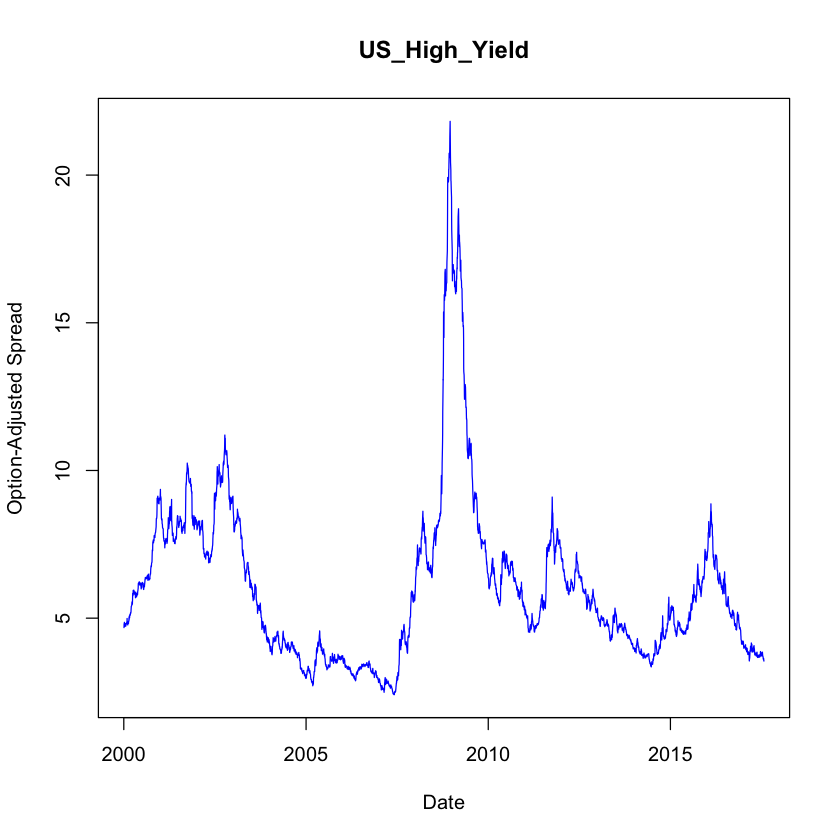

In [216]:
plot_oas(metric=oas,
        indicator='US_High_Yield', 
         start='01-01-2000', 
         end='01-01-2018', 
         frequency='daily'
         )